In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians,sin,cos,sqrt,atan2
import warnings
import folium

warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/Shivan118/New-Machine-Learning-Modular-Coding-projecs/main/Jupyter_notebook_/Data/finalTrain.csv')

In [68]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    78.116106  12-02-2022       21:55             22:10   
1                    76.347589  13-02-2022       14:55             15:05   
2                    74.006619  04-03-2022       17:30             17:40   
3                    75.829346  13-02-2022       09:20             09:30   
4                    80.502929  14-02-2022       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                Fog                  Jam                  2         Snack   
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City  \
0      motorcycle                  3.0       No  Metropolitian   
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                46  
1                23  
2                21  
3                20  
4                41

In [69]:
df.shape

(45584, 20)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [71]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [72]:
df.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         43730.000000             43676.000000         45584.000000   
mean             29.566911                 4.633774            17.017948   
std               5.815064                 0.334744             8.185674   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.500000            12.933284   
50%              30.000000                 4.700000            18.551440   
75%              35.000000                 4.900000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45584.000000                45584.000000   
mean              70.229684                   17.465480   
std               22.885575                    7.335562   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.897963                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  multiple_deliveries  \
count                 45584.000000       45584.000000         44591.000000   
mean                     70.844161           1.023385             0.744635   
std                      21.120578           0.839055             0.572510   
min                       0.010000           0.000000             0.000000   
25%                      73.280000           0.000000             0.000000   
50%                      76.002574           1.000000             1.000000   
75%                      78.107044           2.000000             1.000000   
max                      88.563452           3.000000             3.000000   

       Time_taken (min)  
count      45584.000000  
mean          26.293963  
std            9.384298  
min           10.000000  
25%           19.000000  
50%           26.000000  
75%           32.000000  
max           54.000000

In [73]:
for i in df.columns:
    print(f" no. of unique value in {i}  is : {df[i].nunique()}")
    print("#######################################################")
    if (df[i].nunique()) < 8:
        print(f"           unique value are : {df[i].unique()}")
        print("***************************************************")
    else:
        pass

 no. of unique value in ID  is : 45584
#######################################################
 no. of unique value in Delivery_person_ID  is : 1320
#######################################################
 no. of unique value in Delivery_person_Age  is : 22
#######################################################
 no. of unique value in Delivery_person_Ratings  is : 28
#######################################################
 no. of unique value in Restaurant_latitude  is : 657
#######################################################
 no. of unique value in Restaurant_longitude  is : 518
#######################################################
 no. of unique value in Delivery_location_latitude  is : 4373
#######################################################
 no. of unique value in Delivery_location_longitude  is : 4373
#######################################################
 no. of unique value in Order_Date  is : 44
#######################################################
 no. of unique 

In [74]:
feature =[]
dtypes = []
count =[]
unique =[]
missing =[]
missing_percentage = []

for column in df.columns:
    feature.append(column)
    count.append(len(df[column]))
    missing.append(df[column].isnull().sum())
    missing_percentage.append((df[column].isnull().sum()/df.shape[0])*100)
    unique.append(df[column].nunique())
    dtypes.append(df[column].dtypes)
    
dataframe = pd.DataFrame({'feature':feature,
                          'count':count,
                          'missing':missing,
                          'nunique':unique,
                          'missing_percentage':missing_percentage,
                         'dtypes':dtypes})

dataframe.set_index('feature')

count  missing  nunique  missing_percentage  \
feature                                                                    
ID                           45584        0    45584            0.000000   
Delivery_person_ID           45584        0     1320            0.000000   
Delivery_person_Age          45584     1854       22            4.067217   
Delivery_person_Ratings      45584     1908       28            4.185679   
Restaurant_latitude          45584        0      657            0.000000   
Restaurant_longitude         45584        0      518            0.000000   
Delivery_location_latitude   45584        0     4373            0.000000   
Delivery_location_longitude  45584        0     4373            0.000000   
Order_Date                   45584        0       44            0.000000   
Time_Orderd                  45584     1731      176            3.797385   
Time_Order_picked            45584        0      193            0.000000   
Weather_conditions           45584      616        6            1.351351   
Road_traffic_density         45584      601        4            1.318445   
Vehicle_condition            45584        0        4            0.000000   
Type_of_order                45584        0        4            0.000000   
Type_of_vehicle              45584        0        4            0.000000   
multiple_deliveries          45584      993        4            2.178396   
Festival                     45584      228        2            0.500176   
City                         45584     1200        3            2.632503   
Time_taken (min)             45584        0       45            0.000000   

                              dtypes  
feature                               
ID                            object  
Delivery_person_ID            object  
Delivery_person_Age          float64  
Delivery_person_Ratings      float64  
Restaurant_latitude          float64  
Restaurant_longitude         float64  
Delivery_location_latitude   float64  
Delivery_location_longitude  float64  
Order_Date                    object  
Time_Orderd                   object  
Time_Order_picked             object  
Weather_conditions            object  
Road_traffic_density          object  
Vehicle_condition              int64  
Type_of_order                 object  
Type_of_vehicle               object  
multiple_deliveries          float64  
Festival                      object  
City                          object  
Time_taken (min)               int64

In [75]:
df.drop('ID',axis=1,inplace=True)

## Changing the datetime column in datetime

In [76]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [77]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day

In [78]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Order_Date Time_Orderd Time_Order_picked  ...  \
0                    78.116106 2022-12-02       21:55             22:10  ...   
1                    76.347589 2022-02-13       14:55             15:05  ...   
2                    74.006619 2022-04-03       17:30             17:40  ...   
3                    75.829346 2022-02-13       09:20             09:30  ...   
4                    80.502929 2022-02-14       19:50             20:05  ...   

  Vehicle_condition Type_of_order  Type_of_vehicle multiple_deliveries  \
0                 2         Snack       motorcycle                 3.0   
1                 1          Meal       motorcycle                 1.0   
2                 1        Drinks          scooter                 1.0   
3                 0        Buffet       motorcycle                 0.0   
4                 1         Snack          scooter                 1.0   

  Festival           City Time_taken (min)  year  month  day  
0       No  Metropolitian               46  2022     12    2  
1       No  Metropolitian               23  2022      2   13  
2       No  Metropolitian               21  2022      4    3  
3       No  Metropolitian               20  2022      2   13  
4       No  Metropolitian               41  2022      2   14  

[5 rows x 22 columns]

In [79]:
df.drop('Order_Date',axis=1,inplace=True)

In [80]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [81]:
df.dropna(subset=['Time_Orderd'],inplace=True) # Dropping all the rows where we don't know what was the time when order was made and we cannot impute it

## Cleaning Time Ordered feature and extracting hours and minutes

In [82]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.',':')

In [83]:
df['Time_Orderd'].sample(10)

40046    22:10
2089     17:20
3480     23:45
18926    11:40
4190     17:45
17541    19:50
16334    21:15
38511    18:10
30008    19:40
2643     23:25
Name: Time_Orderd, dtype: object

In [84]:
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [85]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'],format='%H:%M:%S',errors='ignore')

In [86]:
df['TimeOrder_Hour'] = df['Time_Orderd'].str.split(':',expand=True)[0]

df['TimeOrder_Hour'] = df['TimeOrder_Hour'].str.replace('0','00')

df['TimeOrder_Hour'] = df['TimeOrder_Hour'].astype('int32')

In [87]:
# order_minute
df['TimeOrder_min']=df['Time_Orderd'].str.split(':',expand=True)[1]

# changing the datatype
df['TimeOrder_min']=df['TimeOrder_min'].astype('int32')

In [88]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Time_Orderd Time_Order_picked  \
0                    78.116106       21:55             22:10   
1                    76.347589       14:55             15:05   
2                    74.006619       17:30             17:40   
3                    75.829346       09:20             09:30   
4                    80.502929       19:50             20:05   

  Weather_conditions  ... Type_of_vehicle  multiple_deliveries Festival  \
0                Fog  ...      motorcycle                  3.0       No   
1             Stormy  ...      motorcycle                  1.0       No   
2         Sandstorms  ...         scooter                  1.0       No   
3         Sandstorms  ...      motorcycle                  0.0       No   
4                Fog  ...         scooter                  1.0       No   

            City  Time_taken (min)  year month  day  TimeOrder_Hour  \
0  Metropolitian                46  2022    12    2              21   
1  Metropolitian                23  2022     2   13              14   
2  Metropolitian                21  2022     4    3              17   
3  Metropolitian                20  2022     2   13               9   
4  Metropolitian                41  2022     2   14              19   

   TimeOrder_min  
0             55  
1             55  
2             30  
3             20  
4             50  

[5 rows x 23 columns]

## Cleaning Time Order Picked feature and extracting hours and minutes

In [89]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace(".",":")

In [90]:
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [91]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')

In [92]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':',expand=True)[0]

# changing the datatype
df['Time_Order_picked_Hour']=df['Time_Order_picked_Hour'].astype('int32')

In [93]:
df['Time_Order_picked_Min']=df['Time_Order_picked'].str.split(':',expand=True)[1]

df['Time_Order_picked_Min'] = df['Time_Order_picked_Min'].astype('int32')

In [94]:
df

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0          DEHRES17DEL01                 36.0                      4.2   
1          KOCRES16DEL01                 21.0                      4.7   
2         PUNERES13DEL03                 23.0                      4.7   
3         LUDHRES15DEL02                 34.0                      4.3   
4          KNPRES14DEL02                 24.0                      4.7   
...                  ...                  ...                      ...   
45579      JAPRES04DEL01                 30.0                      4.8   
45580      AGRRES16DEL01                 21.0                      4.6   
45581     CHENRES08DEL03                 30.0                      4.9   
45582    COIMBRES11DEL01                 20.0                      4.7   
45583   RANCHIRES09DEL02                 23.0                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                30.327968             78.046106                   30.397968   
1                10.003064             76.307589                   10.043064   
2                18.562450             73.916619                   18.652450   
3                30.899584             75.809346                   30.919584   
4                26.463504             80.372929                   26.593504   
...                    ...                   ...                         ...   
45579            26.902328             75.794257                   26.912328   
45580             0.000000              0.000000                    0.070000   
45581            13.022394             80.242439                   13.052394   
45582            11.001753             76.986241                   11.041753   
45583            23.351058             85.325731                   23.431058   

       Delivery_location_longitude Time_Orderd Time_Order_picked  \
0                        78.116106       21:55             22:10   
1                        76.347589       14:55             15:05   
2                        74.006619       17:30             17:40   
3                        75.829346       09:20             09:30   
4                        80.502929       19:50             20:05   
...                            ...         ...               ...   
45579                    75.804257       11:35             11:45   
45580                     0.070000       19:55             20:10   
45581                    80.272439       23:50             24:05   
45582                    77.026241       13:35             13:40   
45583                    85.405731       17:10             17:15   

      Weather_conditions  ... Festival           City Time_taken (min)  year  \
0                    Fog  ...       No  Metropolitian               46  2022   
1                 Stormy  ...       No  Metropolitian               23  2022   
2             Sandstorms  ...       No  Metropolitian               21  2022   
3             Sandstorms  ...       No  Metropolitian               20  2022   
4                    Fog  ...       No  Metropolitian               41  2022   
...                  ...  ...      ...            ...              ...   ...   
45579              Windy  ...       No  Metropolitian               32  2022   
45580              Windy  ...       No  Metropolitian               36  2022   
45581             Cloudy  ...       No  Metropolitian               16  2022   
45582             Cloudy  ...       No  Metropolitian               26  2022   
45583                Fog  ...       No  Metropolitian               36  2022   

       month day TimeOrder_Hour  TimeOrder_min  Time_Order_picked_Hour  \
0         12   2             21             55                      22   
1          2  13             14             55                      15   
2          4   3             17             30                      17   
3          2  13              9             20                       9   
4       

## extracting city from delivery_person_id

In [95]:
df['delivery_city'] = df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [96]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Time_Orderd Time_Order_picked  \
0                    78.116106       21:55             22:10   
1                    76.347589       14:55             15:05   
2                    74.006619       17:30             17:40   
3                    75.829346       09:20             09:30   
4                    80.502929       19:50             20:05   

  Weather_conditions  ...           City  Time_taken (min)  year month  day  \
0                Fog  ...  Metropolitian                46  2022    12    2   
1             Stormy  ...  Metropolitian                23  2022     2   13   
2         Sandstorms  ...  Metropolitian                21  2022     4    3   
3         Sandstorms  ...  Metropolitian                20  2022     2   13   
4                Fog  ...  Metropolitian                41  2022     2   14   

  TimeOrder_Hour TimeOrder_min  Time_Order_picked_Hour  Time_Order_picked_Min  \
0             21            55                      22                     10   
1             14            55                      15                      5   
2             17            30                      17                     40   
3              9            20                       9                     30   
4             19            50                      20                      5   

   delivery_city  
0            DEH  
1            KOC  
2           PUNE  
3           LUDH  
4            KNP  

[5 rows x 26 columns]

In [97]:
df['delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [98]:
df['Delivery_person_Ratings'].isnull().sum()

268

## filling the null value with the mean of that person id

In [99]:
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()
rating_map

{'AGRRES010DEL01': 4.8,
 'AGRRES010DEL02': 4.7,
 'AGRRES010DEL03': 4.6,
 'AGRRES01DEL01': 4.5,
 'AGRRES01DEL02': 4.7,
 'AGRRES01DEL03': 4.6,
 'AGRRES02DEL01': 4.7,
 'AGRRES02DEL02': 4.6,
 'AGRRES02DEL03': 4.6,
 'AGRRES03DEL01': 4.7,
 'AGRRES03DEL02': 4.7,
 'AGRRES03DEL03': 4.7,
 'AGRRES04DEL01': 4.7,
 'AGRRES04DEL02': 4.8,
 'AGRRES04DEL03': 4.6,
 'AGRRES05DEL01': 4.7,
 'AGRRES05DEL02': 4.6,
 'AGRRES05DEL03': 4.7,
 'AGRRES06DEL01': 4.6,
 'AGRRES06DEL02': 4.7,
 'AGRRES06DEL03': 4.7,
 'AGRRES07DEL01': 4.6,
 'AGRRES07DEL02': 4.6,
 'AGRRES07DEL03': 4.6,
 'AGRRES08DEL01': 4.8,
 'AGRRES08DEL02': 4.7,
 'AGRRES08DEL03': 4.6,
 'AGRRES09DEL01': 4.7,
 'AGRRES09DEL02': 4.7,
 'AGRRES09DEL03': 4.6,
 'AGRRES11DEL01': 4.5,
 'AGRRES11DEL02': 4.6,
 'AGRRES11DEL03': 4.6,
 'AGRRES12DEL01': 4.6,
 'AGRRES12DEL02': 4.6,
 'AGRRES12DEL03': 4.5,
 'AGRRES13DEL01': 4.6,
 'AGRRES13DEL02': 4.5,
 'AGRRES13DEL03': 4.5,
 'AGRRES14DEL01': 4.7,
 'AGRRES14DEL02': 4.6,
 'AGRRES14DEL03': 4.6,
 'AGRRES15DEL01': 4.6,
 'AGRRES

In [100]:
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [101]:
df['Delivery_person_Ratings'].isnull().sum()

0

## working with map

In [102]:
folium.Map(tiles="cartodb positron")

In [103]:
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [104]:
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East



# this data set is realted to india. but in some of latitidude is given in negative(-), negative lattitude is related
# to indian ocean ..

# so that there is much chances that negative sign in lattitude is by mistake

In [105]:
df[df['Restaurant_latitude'] < 0] 

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
83        AGRRES010DEL01                 34.0                      4.7   
274        AGRRES12DEL03                 32.0                      4.7   
1082      GOARES010DEL03                 20.0                      4.7   
1774       BHPRES13DEL02                 39.0                      4.5   
1967       KOLRES16DEL01                 25.0                      4.0   
...                  ...                  ...                      ...   
43851      GOARES16DEL01                 32.0                      4.6   
44042      GOARES14DEL03                 22.0                      5.0   
44631      KOCRES06DEL03                 23.0                      4.8   
44924     AURGRES03DEL03                 30.0                      4.9   
45173      KNPRES16DEL02                 30.0                      4.0   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
83              -27.163303             78.057044                   27.233303   
274             -27.165108             78.015053                   27.225108   
1082            -15.546594             73.760431                   15.606594   
1774            -23.230791             77.437020                   23.250791   
1967            -22.539129             88.365507                   22.549129   
...                    ...                   ...                         ...   
43851           -15.498603             73.826911                   15.568603   
44042           -15.157944             73.950889                   15.217944   
44631            -9.982834             76.283268                   10.072834   
44924           -19.874733             75.353942                   19.904733   
45173           -26.482581             80.315628                   26.532581   

       Delivery_location_longitude Time_Orderd Time_Order_picked  \
83                       78.127044        0:95             23:05   
274                      78.075053       20:55             21:10   
1082                     73.820431        0:83             20:10   
1774                     77.457020       09:15             09:20   
1967                     88.375507       09:25             09:30   
...                            ...         ...               ...   
43851                    73.896911       23:10             23:15   
44042                    74.010889       18:50             18:55   
44631                    76.373268       19:20             19:35   
44924                    75.383942       22:20             22:35   
45173                    80.365628       22:25             22:40   

      Weather_conditions  ...           City  Time_taken (min)  year month  \
83            Sandstorms  ...  Metropolitian                15  2022     2   
274           Sandstorms  ...  Metropolitian                31  2022     2   
1082              Cloudy  ...  Metropolitian                29  2022     2   
1774              Cloudy  ...  Metropolitian                29  2022     2   
1967          Sandstorms  ...  Metropolitian                19  2022     2   
...                  ...  ...            ...               ...   ...   ...   
43851         Sandstorms  ...  Metropolitian                24  2022     2   
44042         Sandstorms  ...  Metropolitian                27  2022     2   
44631              Sunny  ...  Metropolitian                21  2022     2   
44924                Fog  ...  Metropolitian                15  2022     2   
45173         Sandstorms  ...  Metropolitian                34  2022     2   

       day TimeOrder_Hour TimeOrder_min  Time_Order_picked_Hour  \
83      16              0            95                      23   
274     13            200            55                      21   
1082    13              0            83                      20   
1774    13              9            15                       9   
1967    15              9            25                       9   


In [106]:
# changing -ve to +ve dataset
"""
abs() function return the absolute value. The absolute
value of any number is always positive it removes the negative sign of a number in Python.
"""
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

To calculate the distance between two points on a sphere (such as the Earth), we can use the Haversine formula

- The Haversine formula is a mathematical formula used to calculate the shortest distance between two points on the surface of a sphere given their latitude and longitude coordinates. It's commonly used in navigation and geographic calculations, especially when dealing with relatively short distances. The formula takes into account the spherical nature of the Earth and provides an accurate approximation of distances between points on the Earth's surface.


In [107]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist

In [108]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Time_Orderd Time_Order_picked  \
0                    78.116106       21:55             22:10   
1                    76.347589       14:55             15:05   
2                    74.006619       17:30             17:40   
3                    75.829346       09:20             09:30   
4                    80.502929       19:50             20:05   

  Weather_conditions  ...           City  Time_taken (min)  year month  day  \
0                Fog  ...  Metropolitian                46  2022    12    2   
1             Stormy  ...  Metropolitian                23  2022     2   13   
2         Sandstorms  ...  Metropolitian                21  2022     4    3   
3         Sandstorms  ...  Metropolitian                20  2022     2   13   
4                Fog  ...  Metropolitian                41  2022     2   14   

  TimeOrder_Hour TimeOrder_min  Time_Order_picked_Hour  Time_Order_picked_Min  \
0             21            55                      22                     10   
1             14            55                      15                      5   
2             17            30                      17                     40   
3              9            20                       9                     30   
4             19            50                      20                      5   

   delivery_city  
0            DEH  
1            KOC  
2           PUNE  
3           LUDH  
4            KNP  

[5 rows x 26 columns]

In [109]:
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

In [110]:
df['distance']

0        10.280582
1         6.242319
2        13.787860
3         2.930258
4        19.396618
           ...    
45579     1.489846
45580    11.007735
45581     4.657195
45582     6.232393
45583    12.074396
Name: distance, Length: 43853, dtype: float64

In [111]:
df.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [112]:
# droping those lattitude and longitude which are less than and above to
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East

In [113]:
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

# these 3509 record is of no use. bcz the wrong lattitude is mention

(3509, 27)

In [114]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8

df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [115]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

Empty DataFrame
Columns: [Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Time_Orderd, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken (min), year, month, day, TimeOrder_Hour, TimeOrder_min, Time_Order_picked_Hour, Time_Order_picked_Min, delivery_city, distance]
Index: []

[0 rows x 27 columns]

In [116]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

Empty DataFrame
Columns: [Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Time_Orderd, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken (min), year, month, day, TimeOrder_Hour, TimeOrder_min, Time_Order_picked_Hour, Time_Order_picked_Min, delivery_city, distance]
Index: []

[0 rows x 27 columns]

In [117]:
df[(df['Restaurant_longitude'] > 95) & (df['Delivery_location_longitude'] > 95)]

Empty DataFrame
Columns: [Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Time_Orderd, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken (min), year, month, day, TimeOrder_Hour, TimeOrder_min, Time_Order_picked_Hour, Time_Order_picked_Min, delivery_city, distance]
Index: []

[0 rows x 27 columns]

In [118]:
min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(1)
min_distance

Restaurant_latitude  Restaurant_longitude  \
distance                                              
1.465067            30.914057              75.83982   

          Delivery_location_latitude  Delivery_location_longitude  
distance                                                           
1.465067                   30.924057                     75.84982

In [119]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

In [120]:
max_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

Restaurant_latitude  Restaurant_longitude  \
distance                                               
20.969489            25.443994             81.860187   

           Delivery_location_latitude  Delivery_location_longitude  
distance                                                            
20.969489                   25.583994                    82.000187

In [121]:
tooltips=f"Distance: {df['distance'].max()} km"

In [122]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[25.443994, 81.860187], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994,82.000187]], color='red',tooltip=tooltips).add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

In [123]:
# plotting the lattitude and loggitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

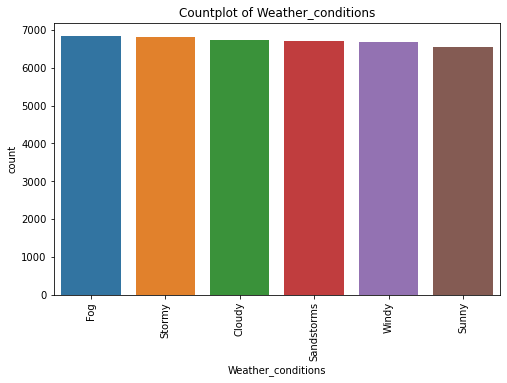

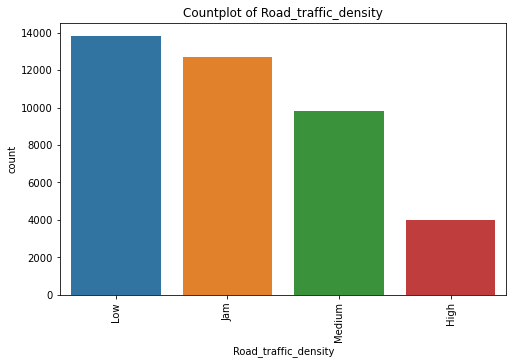

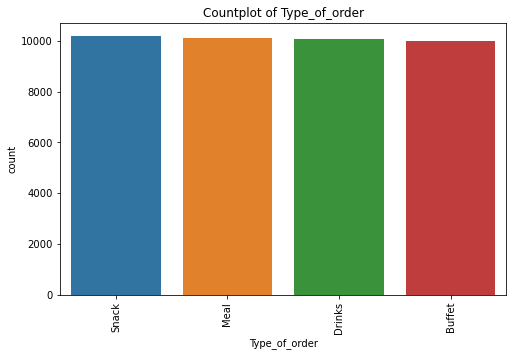

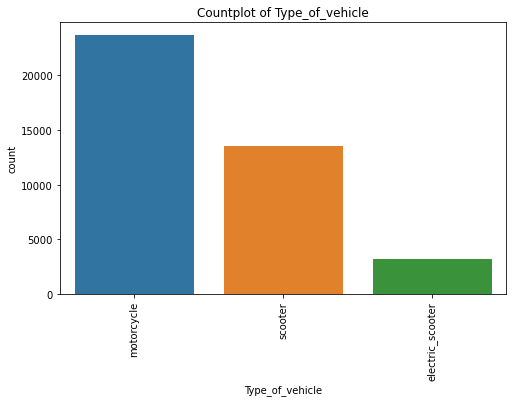

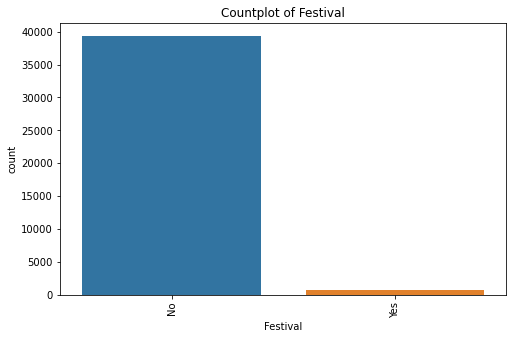

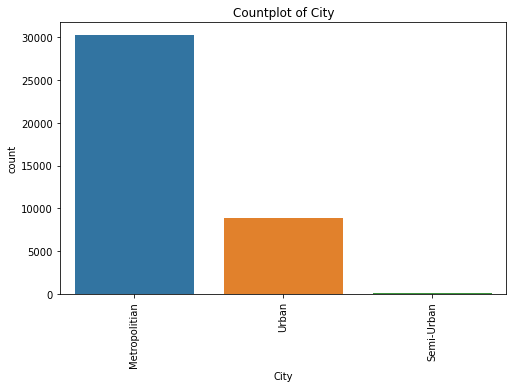

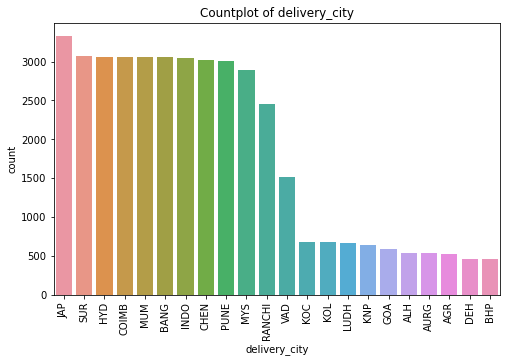

In [130]:
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 5))
    if column not in ['Delivery_person_ID','Time_Orderd','Time_Order_picked']:
        sns.countplot(data=df, x=column,order=df[column].value_counts().index)
        plt.title(f'Countplot of {column}')
        plt.xticks(rotation=90)
        plt.show()

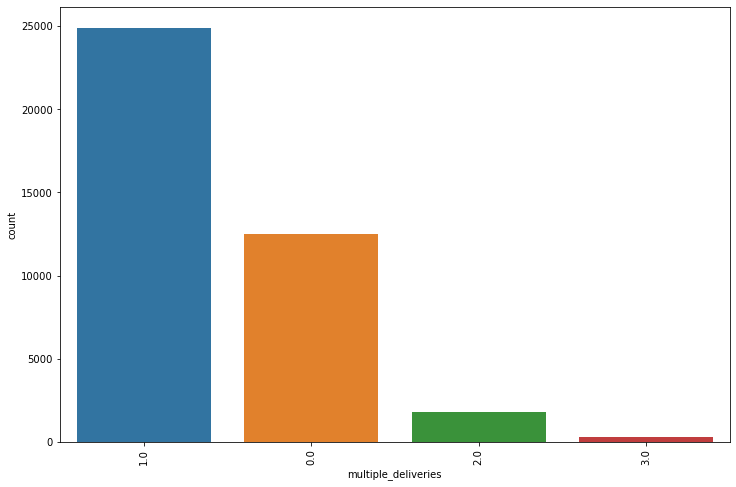

In [131]:
plt.figure(figsize=(12,8))
sns.countplot(df['multiple_deliveries'],order=df['multiple_deliveries'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

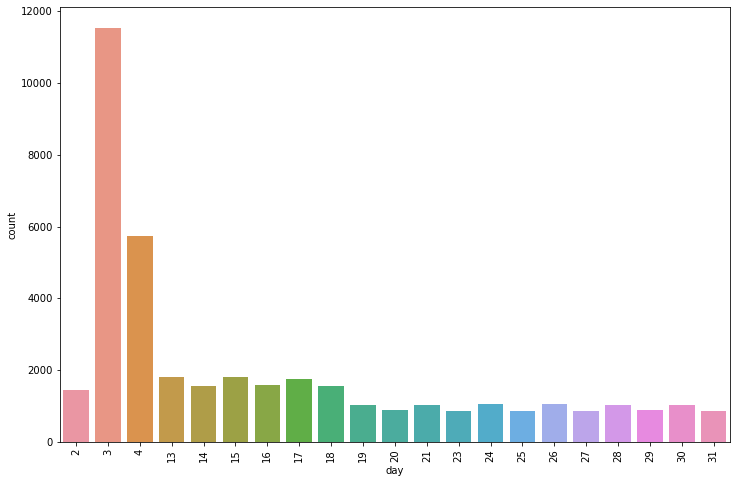

In [133]:
plt.figure(figsize=(12,8))
sns.countplot(df['day'])
plt.xticks(rotation='vertical')
plt.show()

In [136]:
data1 = df.groupby(['delivery_city']).median().reset_index()

In [137]:
data1.head()

delivery_city  Delivery_person_Age  Delivery_person_Ratings  \
0           AGR                 29.0                      4.7   
1           ALH                 30.0                      4.7   
2          AURG                 30.0                      4.7   
3          BANG                 30.0                      4.7   
4           BHP                 30.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            27.161694             78.042990                   27.231850   
1            25.451646             81.834502                   25.519872   
2            19.876106             75.340775                   19.935337   
3            12.970221             77.640489                   13.015662   
4            23.232357             77.429845                   23.291943   

   Delivery_location_longitude  Vehicle_condition  multiple_deliveries  \
0                    78.100165                  1                  1.0   
1                    81.904492                  1                  1.0   
2                    75.402353                  1                  1.0   
3                    77.695396                  1                  1.0   
4                    77.479399                  1                  1.0   

   Time_taken (min)  year  month  day  TimeOrder_Hour  TimeOrder_min  \
0                26  2022      2   15              19             30   
1                27  2022      2   14              19             35   
2                26  2022      2   15              19             35   
3                25  2022      3   13              19             35   
4                26  2022      2   15              18             35   

   Time_Order_picked_Hour  Time_Order_picked_Min   distance  
0                      19                     35  10.416889  
1                      19                     35  10.485604  
2                      18                     35   9.157670  
3                      18                     35   9.315069  
4                      18                     35   9.059835

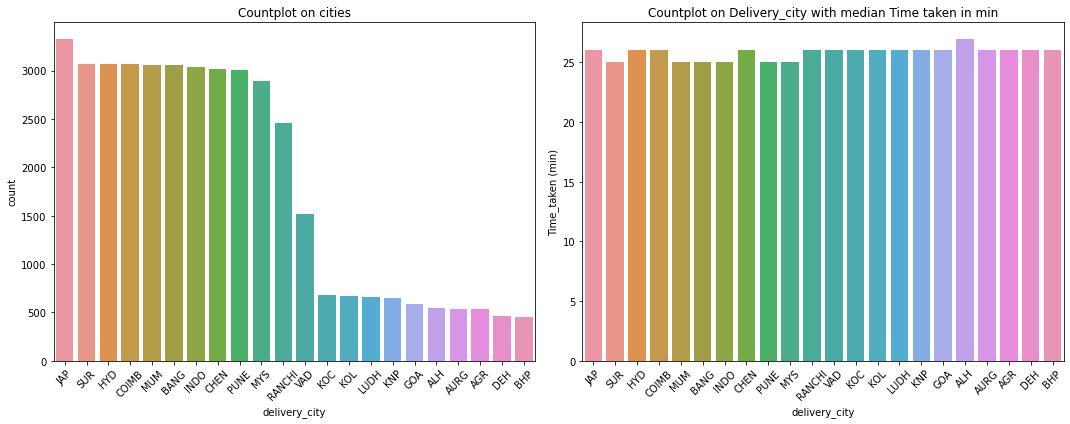

In [147]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['delivery_city'],order=df['delivery_city'].value_counts().index)
plt.title("Countplot on cities")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
data1 = df.groupby(['delivery_city']).median().reset_index()
ax = sns.barplot(x='delivery_city', y='Time_taken (min)',
                data=data1,errwidth=0,order=df['delivery_city'].value_counts().index)
plt.title('Countplot on Delivery_city with median Time taken in min')
plt.xticks(rotation=45)

plt.tight_layout()

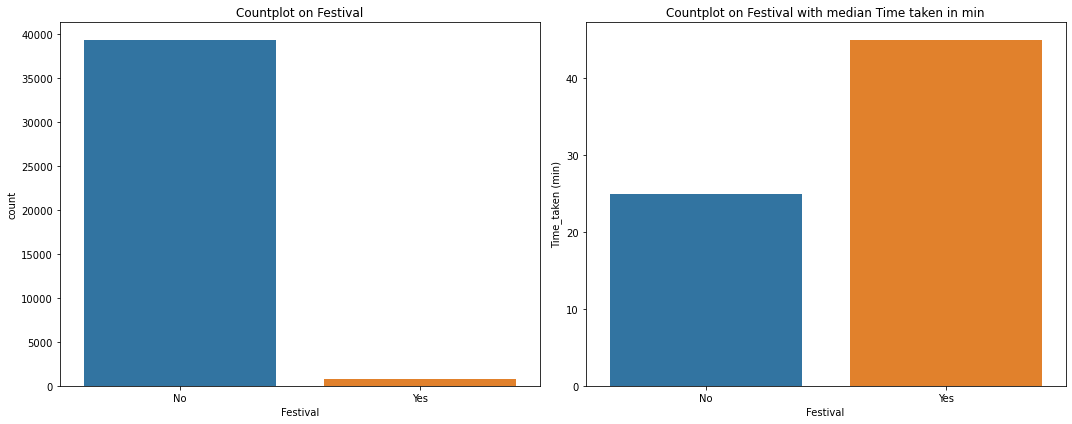

In [148]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Festival'])
plt.title("Countplot on Festival")

plt.subplot(1,2,2)
data1 = df.groupby(['Festival']).median().reset_index()
ax = sns.barplot(x='Festival', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Festival with median Time taken in min')

plt.tight_layout()


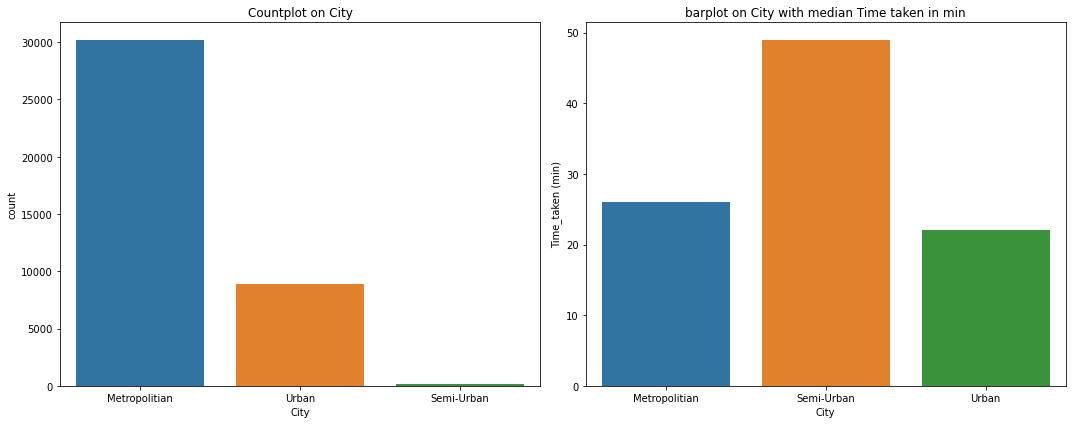

In [149]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['City'])
plt.title("Countplot on City")

plt.subplot(1,2,2)
data1 = df.groupby(['City']).median().reset_index()
ax = sns.barplot(x='City', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on City with median Time taken in min')

plt.tight_layout()

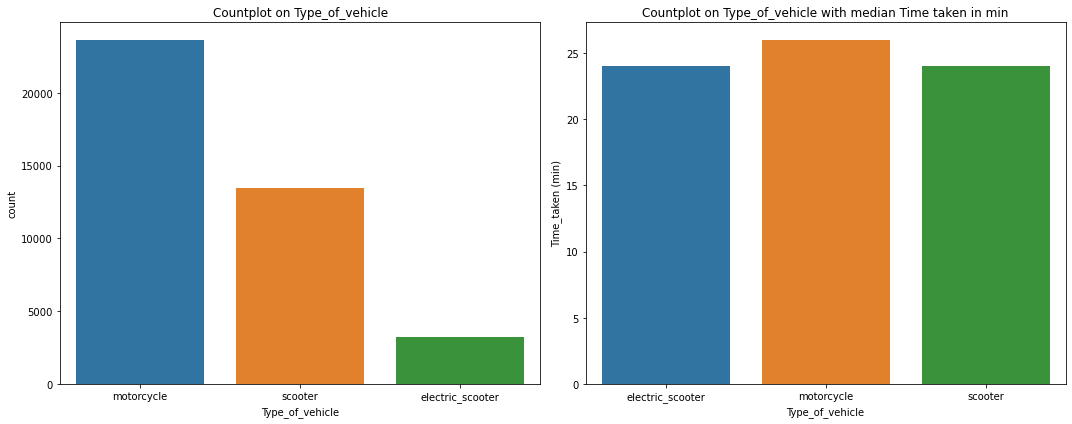

In [150]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Type_of_vehicle'])
plt.title("Countplot on Type_of_vehicle")

plt.subplot(1,2,2)
data1 = df.groupby(['Type_of_vehicle']).median().reset_index()
ax = sns.barplot(x='Type_of_vehicle', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Type_of_vehicle with median Time taken in min')

plt.tight_layout()


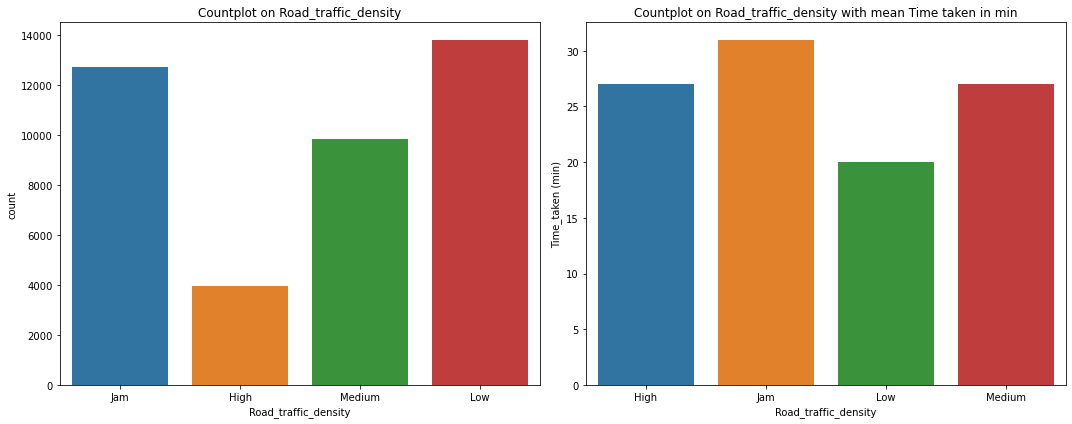

In [151]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Road_traffic_density'])
plt.title("Countplot on Road_traffic_density")

plt.subplot(1,2,2)
data1 = df.groupby(['Road_traffic_density']).median().reset_index()
ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

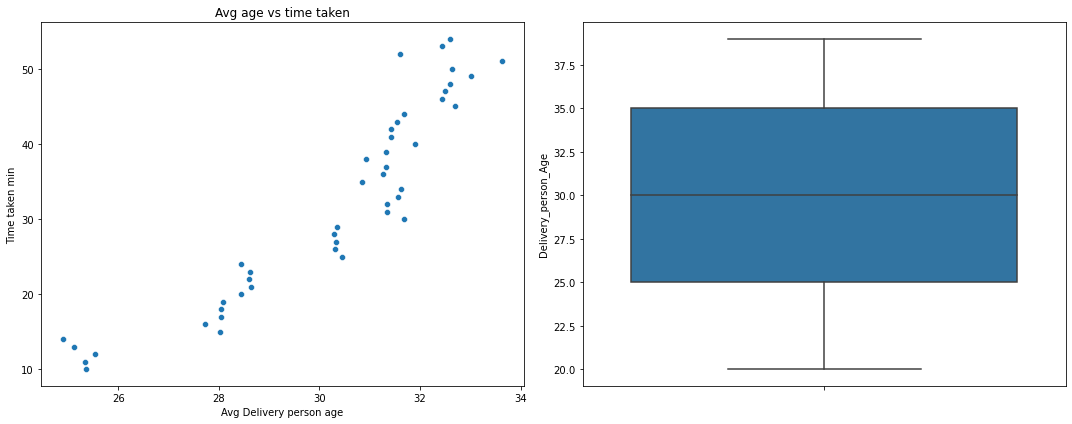

In [152]:
# The avg delivery person age w.r.t Time taken in min
data1 = df.groupby(['Time_taken (min)']).mean().reset_index()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=df['Delivery_person_Age'])
plt.tight_layout()
plt.show()

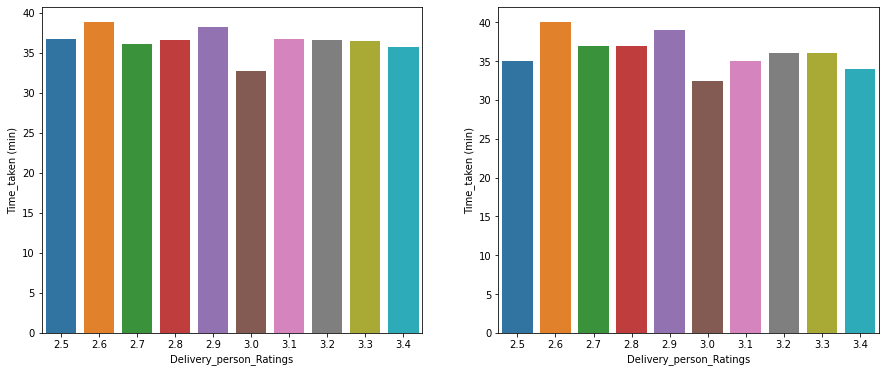

In [158]:
data1 = df.groupby(['Delivery_person_Ratings']).mean().reset_index()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data1.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')

data2 = df.groupby(['Delivery_person_Ratings']).median().reset_index()

plt.subplot(1,2,2)
sns.barplot(data=data2.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')
plt.show()

In [159]:
df.drop('Delivery_person_ID',axis=1,inplace=True)

In [160]:
df.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)


In [161]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_Min',
       'delivery_city', 'distance'],
      dtype='object')

In [162]:
num_col = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_col = [feature for feature in df.columns if df[feature].dtype == 'O']

In [163]:
num_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_Min',
 'distance']

In [164]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'delivery_city']

In [166]:
df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'year','month','day','TimeOrder_min','Time_Order_picked_Hour','Time_Order_picked_Min'],axis=1,inplace=True)

In [167]:
X = df.drop(labels=['Time_taken (min)'],axis=1)
y = df[['Time_taken (min)']]

In [168]:
df[cat_col].head()

Weather_conditions Road_traffic_density Type_of_order Type_of_vehicle  \
0                Fog                  Jam         Snack      motorcycle   
1             Stormy                 High          Meal      motorcycle   
2         Sandstorms               Medium        Drinks         scooter   
3         Sandstorms                  Low        Buffet      motorcycle   
4                Fog                  Jam         Snack         scooter   

  Festival           City delivery_city  
0       No  Metropolitian           DEH  
1       No  Metropolitian           KOC  
2       No  Metropolitian          PUNE  
3       No  Metropolitian          LUDH  
4       No  Metropolitian           KNP

In [170]:
num_col=[feature for feature in df.columns if df[feature].dtypes != 'O']

In [171]:
df[num_col].head()

Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  \
0                 36.0                      4.2                  2   
1                 21.0                      4.7                  1   
2                 23.0                      4.7                  1   
3                 34.0                      4.3                  0   
4                 24.0                      4.7                  1   

   multiple_deliveries  Time_taken (min)  TimeOrder_Hour   distance  
0                  3.0                46              21  10.280582  
1                  1.0                23              14   6.242319  
2                  1.0                21              17  13.787860  
3                  0.0                20               9   2.930258  
4                  1.0                41              19  19.396618

In [172]:
df[df['Road_traffic_density']=='Low']

Delivery_person_Age  Delivery_person_Ratings Weather_conditions  \
3                     34.0                      4.3         Sandstorms   
11                    31.0                      4.7         Sandstorms   
12                    37.0                      5.0         Sandstorms   
17                    35.0                      4.3             Cloudy   
19                    23.0                      4.8              Windy   
...                    ...                      ...                ...   
45569                 30.0                      4.9              Windy   
45571                 34.0                      4.9         Sandstorms   
45573                 30.0                      4.6             Cloudy   
45575                 37.0                      4.8         Sandstorms   
45581                 30.0                      4.9             Cloudy   

      Road_traffic_density  Vehicle_condition Type_of_order   Type_of_vehicle  \
3                      Low                  0        Buffet        motorcycle   
11                     Low                  2          Meal  electric_scooter   
12                     Low                  1         Snack        motorcycle   
17                     Low                  1        Drinks           scooter   
19                     Low                  2        Buffet  electric_scooter   
...                    ...                ...           ...               ...   
45569                  Low                  1         Snack        motorcycle   
45571                  Low                  1         Snack           scooter   
45573                  Low                  0          Meal        motorcycle   
45575                  Low                  2        Drinks  electric_scooter   
45581                  Low                  1        Drinks           scooter   

       multiple_deliveries Festival           City  Time_taken (min)  \
3                      0.0       No  Metropolitian                20   
11                     0.0       No  Metropolitian                26   
12                     1.0       No  Metropolitian                20   
17                     0.0       No  Metropolitian                38   
19                     0.0       No          Urban                12   
...                    ...      ...            ...               ...   
45569                  1.0       No  Metropolitian                26   
45571                  1.0       No            NaN                26   
45573                  0.0       No  Metropolitian                20   
45575                  0.0       No  Metropolitian                20   
45581                  0.0       No  Metropolitian                16   

       TimeOrder_Hour delivery_city   distance  
3                   9          LUDH   2.930258  
11                 22        RANCHI  19.618739  
12                  8         COIMB   1.558132  
17                 23           SUR  13.682045  
19                 23          PUNE  16.853619  
...               ...           ...        ...  
45569             100         COIMB   3.116127  
45571               9           MYS   3.109134  
45573               0          PUNE   3.064267  
45575               9          CHEN   3.104827  
45581              23          CHEN   4.657195  

[13815 rows x 14 columns]

In [173]:
Road_traffic_density=['Low','Medium','High','Jam']
Weather_conditions=['Sunny','Cloudy','Windy','Fog','Sandstorms','Stormy']

In [180]:
categorical_column=['Type_of_order','Type_of_vehicle','Festival','City','delivery_city']
ordinal_encod=['Road_traffic_density','Weather_conditions']
numerical_column=['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','multiple_deliveries',
                  'TimeOrder_Hour','distance']

In [181]:
# numerical pipeline

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler(with_mean=False))
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])


# ordinal pipeline

ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions])),
    ('scaler',StandardScaler(with_mean=False))   
])

In [182]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [184]:
X_train.head()

Delivery_person_Age  Delivery_person_Ratings Weather_conditions  \
9333                  30.0                      4.7         Sandstorms   
19418                 25.0                      4.8         Sandstorms   
3575                  37.0                      4.6                Fog   
20604                 31.0                      4.6              Windy   
42841                 23.0                      4.6              Sunny   

      Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  \
9333                   Low                  2        Drinks         scooter   
19418               Medium                  0          Meal      motorcycle   
3575                  High                  1          Meal         scooter   
20604               Medium                  1         Snack      motorcycle   
42841               Medium                  2        Buffet         scooter   

       multiple_deliveries Festival           City  TimeOrder_Hour  \
9333                   1.0       No  Metropolitian               8   
19418                  1.0       No  Metropolitian              18   
3575                   1.0       No          Urban              11   
20604                  1.0       No  Metropolitian              17   
42841                  0.0       No          Urban              17   

      delivery_city   distance  
9333          COIMB   1.558115  
19418           JAP  19.362580  
3575           CHEN   1.552233  
20604           JAP  16.381599  
42841           MYS  12.434913

In [185]:
X_train=preprocessor.fit_transform(X_train)

In [186]:
X_test=preprocessor.transform(X_test)

In [187]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [188]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))
   
    return r2, MAE , MSE,rmse

In [189]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor(), 
  
}

r2_list=[]
mse_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    

    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    # Test set performance
    r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
    r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)
    

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))
    r2_list.append(r2)
    mse_list.append(MSE)
    
    print('-'*35)
        
    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))

    print('='*35)
    print('='*35)
    print('\n')


Random Forest
Model performance for Test set
- r2_score: 0.8287
- MAE: 3.1286
- MSE: 15.2910
- rmse: 3.9104
-----------------------------------
Model performance for train set
- r2_score: 0.9758
- MAE: 1.1510
- MSE: 2.1195
- rmse: 1.4559


Decision Tree
Model performance for Test set
- r2_score: 0.6886
- MAE: 4.0569
- MSE: 27.7981
- rmse: 5.2724
-----------------------------------
Model performance for train set
- r2_score: 1.0000
- MAE: 0.0000
- MSE: 0.0000
- rmse: 0.0000


Gradient Boosting
Model performance for Test set
- r2_score: 0.7761
- MAE: 3.5772
- MSE: 19.9879
- rmse: 4.4708
-----------------------------------
Model performance for train set
- r2_score: 0.7801
- MAE: 3.5156
- MSE: 19.2339
- rmse: 4.3857


linear Regression
Model performance for Test set
- r2_score: 0.5348
- MAE: 5.1333
- MSE: 41.5193
- rmse: 6.4435
-----------------------------------
Model performance for train set
- r2_score: 0.5392
- MAE: 5.0386
- MSE: 40.3089
- rmse: 6.3489


Ridge
Model performance for Te

In [190]:
Results = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score'])
Results.sort_values(by=["r2_score"],ascending=False)

Model Name  r2_score
0      Random Forest  0.828684
5       XGBRegressor  0.827868
2  Gradient Boosting  0.776062
1      Decision Tree  0.688559
4              Ridge  0.534907
3  linear Regression  0.534832

In [191]:
Results = pd.DataFrame(list(zip(models_list, mse_list)), columns=['Model Name', 'Mse'])
Results.sort_values(by=["Mse"],ascending=True)

Model Name        Mse
0      Random Forest  15.291026
5       XGBRegressor  15.363909
2  Gradient Boosting  19.987906
1      Decision Tree  27.798116
4              Ridge  41.512615
3  linear Regression  41.519302